Iris Dataset - KNN Classifier
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


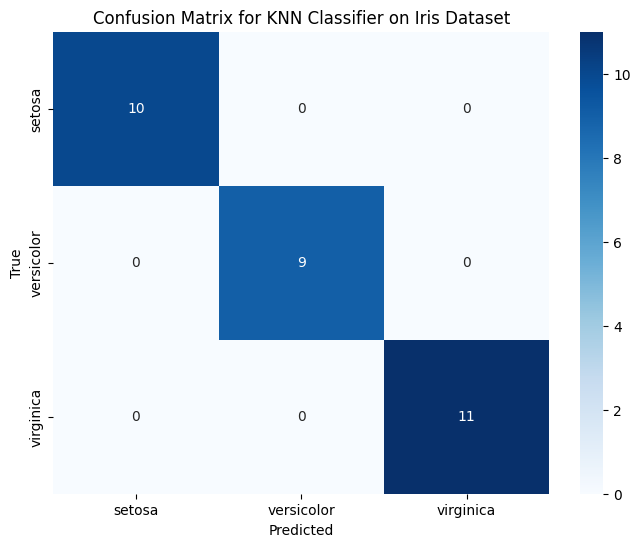

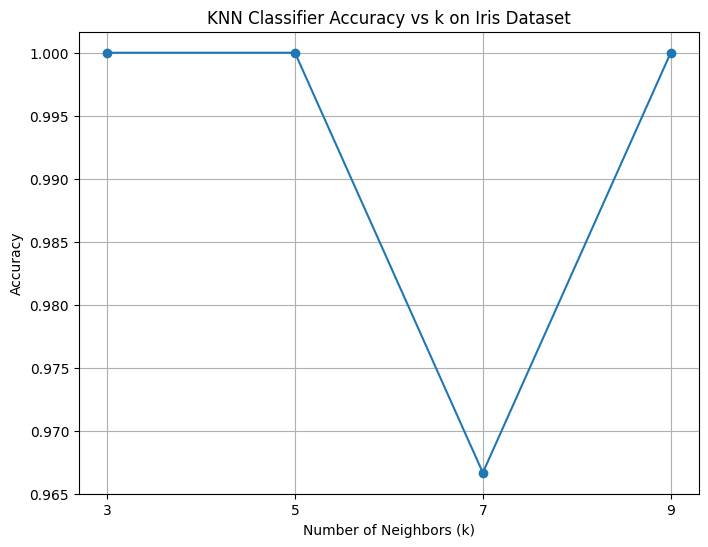

Effect of k on model performance:
As k increases, the model becomes more generalized, which can lead to a decrease in accuracy if k is too large. A smaller k can capture more local patterns but may also lead to overfitting.

California Housing Dataset - KNN Regressor
RMSE: 1.0576778270706204
R^2 Score: 0.14631049965900345


In [1]:
# Q1) K-Nearest Neighbors (KNN) Classifier and RegressionDataset(s):
# Iris Dataset: https://archive.ics.uci.edu/ml/datasets/iris
# California Housing Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
# a) Load the Iris dataset, split it into training and testing sets, and implement a K-Nearest Neighbors Classifier to predict the flower species. Evaluate the model performance using accuracy and confusion matrix.
# b) Experiment with different values of k (e.g., 3, 5, 7, 9) and plot how accuracy changes with k. Briefly explain the effect of k on model performance.
# c) Using the California Housing Dataset, implement a KNeighborsRegressor to predict median house prices. Evaluate the model using RMSE and R² score, and discuss the impact of n_neighbors on regression performance.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')
# a) KNN Classifier on Iris Dataset
# Load the Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
# Split the dataset into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
# Implement KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_classifier.predict(X_test_iris)
# Evaluate the model
accuracy = accuracy_score(y_test_iris, y_pred_iris)
confusion = confusion_matrix(y_test_iris, y_pred_iris)
print("Iris Dataset - KNN Classifier")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN Classifier on Iris Dataset')
plt.show()
# b) Experiment with different values of k
k_values = [3, 5, 7, 9]
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, y_train_iris)
    y_pred = knn.predict(X_test_iris)
    acc = accuracy_score(y_test_iris, y_pred)
    accuracies.append(acc)
# Plot accuracy vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs k on Iris Dataset')
plt.xticks(k_values)
plt.grid()
plt.show()
print("Effect of k on model performance:")
print("As k increases, the model becomes more generalized, which can lead to a decrease in accuracy if k is too large. A smaller k can capture more local patterns but may also lead to overfitting.")
# c) KNN Regressor on California Housing Dataset
# Load the California Housing dataset
california = fetch_california_housing()
X_california = california.data
y_california = california.target
# Split the dataset into training and testing sets
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)
# Implement KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_california, y_train_california)
y_pred_california = knn_regressor.predict(X_test_california)
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_california, y_pred_california))
r2 = r2_score(y_test_california, y_pred_california)
print("\nCalifornia Housing Dataset - KNN Regressor")   
print("RMSE:", rmse)
print("R^2 Score:", r2)

In [3]:
# Q2) Naive Bayes with Mixed Numeric and Categorical Features
# Dataset:
# Adult Income Dataset: https://archive.ics.uci.edu/ml/datasets/adult
# — Predict whether income > $50K/year
# a) Load and preprocess the dataset by handling missing values, encoding categorical variables (e.g., using OneHotEncoder), and scaling numeric variables (using StandardScaler).
# b) Train two Naive Bayes models: GaussianNB and CategoricalNB. Compare their performance using accuracy, precision, and recall.
# c) Analyze and explain which model performs better and why, considering the nature of the dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# a) Load and preprocess the Adult Income dataset
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# Preprocess the dataset
# Handle missing values
df = df.dropna()

# Separate target variable before preprocessing
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df = df.drop('income', axis=1)

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode categorical variables using Label Encoding (for simplicity)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# b) Train two Naive Bayes models: GaussianNB and CategoricalNB
# GaussianNB (works with continuous features)
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gaussian = gaussian_nb.predict(X_test)

# CategoricalNB (requires non-negative integer features)
# We need to ensure all features are non-negative integers for CategoricalNB
from sklearn.preprocessing import MinMaxScaler
# Scale to [0, 1] and then multiply to get larger range for better categorical representation
min_max_scaler = MinMaxScaler(feature_range=(0, 100))
X_train_cat = min_max_scaler.fit_transform(X_train).astype(int)
X_test_cat = min_max_scaler.transform(X_test).astype(int)

categorical_nb = CategoricalNB()
categorical_nb.fit(X_train_cat, y_train)
y_pred_categorical = categorical_nb.predict(X_test_cat)
# b) Train two Naive Bayes models: GaussianNB and CategoricalNB
# GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gaussian = gaussian_nb.predict(X_test)

# CategoricalNB
categorical_nb = CategoricalNB()
categorical_nb.fit(X_train, y_train)
y_pred_categorical = categorical_nb.predict(X_test)
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print(classification_report(y_true, y_pred))
    print("\n")     
evaluate_model(y_test, y_pred_gaussian, "GaussianNB")
evaluate_model(y_test, y_pred_categorical, "CategoricalNB") 
# c) Analyze and explain which model performs better and why
print("Analysis:")
print("The performance of GaussianNB and CategoricalNB can vary based on the nature of the dataset. GaussianNB assumes that the features follow a normal distribution, which may not be true for all features in the Adult Income dataset. On the other hand, CategoricalNB is designed to handle categorical features directly, making it potentially more suitable for datasets with a mix of categorical and numeric features. The model that performs better will depend on how well these assumptions align with the actual data distribution.")


TypeError: unsupported operand type(s) for /: 'str' and 'int'